# Classificazione Binaria: `selfMade` con Decision Tree entropy


In [6]:
import pandas as pd

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

Vine istanziata un albero decisinale specificando il criterio entropy

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model, plot_roc_curve

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

evaluate_and_save_model(
    model,
    "decision tree entropy",
    y_train,
    y_pred_train,
    y_test,
    y_pred,
    "../results/classification_selfMade/decision_tree/entropy",
    "../models/decision_tree_selfmade_entropy.joblib"
)



In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=3, feature_names=X_train.columns, class_names=["False", "True"])
plt.savefig("../results/classification_selfMade/decision_tree/entropy/preview_entropy.png")
plt.close()

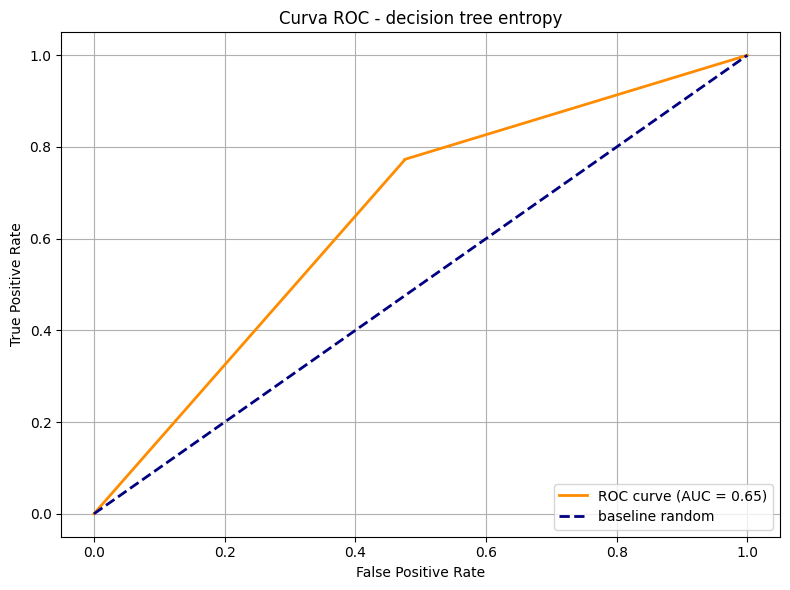

np.float64(0.6483826247689464)

In [10]:
plot_roc_curve(model, X_test, y_test, "decision tree entropy",f"../results/classification_selfMade/roc")
